<a href="https://colab.research.google.com/github/krixik-ai/krixik-docs/blob/main/docs/examples/single_module_pipelines/single_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import json
import importlib
from pathlib import Path

# demo setup - including secrets instantiation, requirements installation, and path setting
if os.getenv("COLAB_RELEASE_TAG"):
    # if running this notebook in Google Colab - make sure to enter your secrets
    MY_API_KEY = "YOUR_API_KEY_HERE"
    MY_API_URL = "YOUR_API_URL_HERE"

    # if running this notebook on Google Colab - install requirements and pull required subdirectories
    # install Krixik python client
    !pip install krixik

    # install github clone - allows for easy cloning of subdirectories from docs repo: https://github.com/krixik-ai/krixik-docs
    !pip install github-clone

    # clone datasets
    if not Path("data").is_dir():
        !ghclone https://github.com/krixik-ai/krixik-docs/tree/main/data
    else:
        print("docs datasets already cloned!")

    # define data dir
    data_dir = "./data/"

    # create output dir
    from pathlib import Path

    Path(data_dir + "/output").mkdir(parents=True, exist_ok=True)

else:
    # if running local pull of docs - set paths relative to local docs structure
    # import utilities
    sys.path.append("../../../")

    # define data_dir
    data_dir = "../../../data/"

    # if running this notebook locally from Krixik docs repo - load secrets from a .env placed at the base of the docs repo
    from dotenv import load_dotenv

    load_dotenv("../../../.env")

    MY_API_KEY = os.getenv("MY_API_KEY")
    MY_API_URL = os.getenv("MY_API_URL")

# import Krixik and initialize it with your personal secrets
from krixik import krixik

krixik.init(api_key=MY_API_KEY, api_url=MY_API_URL)

SUCCESS: You are now authenticated.


## Single-Module Pipeline: `ocr`
[🇨🇴 Versión en español de este documento](https://krixik-docs.readthedocs.io/es-main/ejemplos/ejemplos_pipelines_modulo_unico/unico_ocr_roc/)

This document is a walkthrough of how to assemble and use a single-module pipeline that only includes an [`ocr`](../../modules/ai_modules/ocr_module.md) module. 

Optical Character Recognition (OCR) is a technology that converts different types of documents, such as scanned paper documents, PDFs, and images captured by a digital camera, into editable and searchable data by extracting and organizing all text from the source document. OCR applications include digitizing printed texts for archiving, automating data entry processes, enabling text-to-speech for accessibility, and extracting information for machine learning and data analytics.

The document is divided into the following sections:

- [Pipeline Setup](#pipeline-setup)
- [Required Input Format](#required-input-format)
- [Using the Default Model](#using-the-default-model)
- [Using a Non-Default Model](#using-a-non-default-model)

### Pipeline Setup

Let's first instantiate a single-module [`ocr`](../../modules/ai_modules/ocr_module.md) pipeline.

We use the [`create_pipeline`](../../system/pipeline_creation/create_pipeline.md) method for this, passing only the [`ocr`](../../modules/ai_modules/ocr_module.md) module name into `module_chain`.

In [2]:
# create a pipeline with a single ocr module
pipeline = krixik.create_pipeline(name="single_ocr_1", module_chain=["ocr"])

### Required Input Format

The [`ocr`](../../modules/ai_modules/ocr_module.md) module accepts `.png`, `.jpg`, and `.jpeg` images as [input](../../modules/ai_modules/ocr_module.md#inputs-and-outputs-of-the-ocr-module).

Let's take a quick look at a valid input file, and then process it.

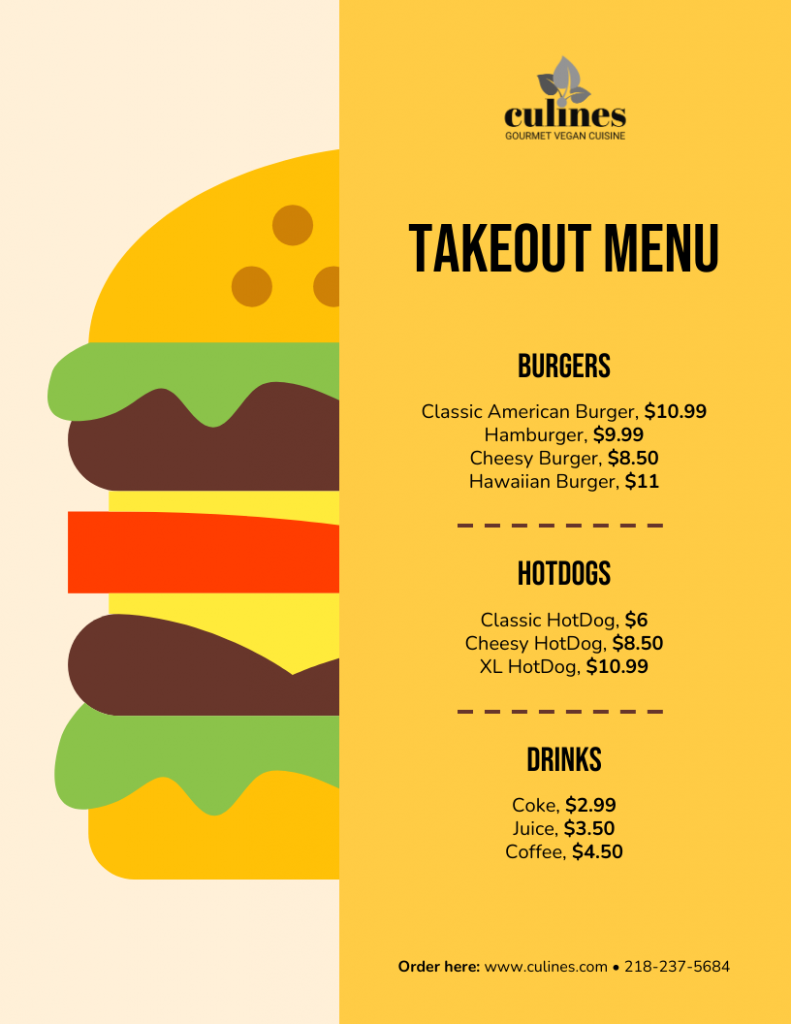

In [3]:
# examine the contents of a valid input file, this example taken from --> https://venngage.com/templates/menus/yellow-burger-takeout-menu-70bd168b-7813-44d4-9581-c7b6ab1c0f67
from IPython.display import Image

Image(filename=data_dir + "input/menu_1.png")

### Using the Default Model

Let's process our test input file using the [`ocr`](../../modules/ai_modules/ocr_module.md) module's [`default model`](../../modules/ai_modules/ocr_module.md#available-models-in-the-ocr-module): [`tesseract-en`](https://github.com/tesseract-ocr/tesseract).

Given that this is the default model, we need not specify model selection through the optional [`modules`](../../system/parameters_processing_files_through_pipelines/process_method.md#selecting-models-via-the-modules-argument) argument in the [`process`](../../system/parameters_processing_files_through_pipelines/process_method.md) method.

In [4]:
# process the file with the default model
process_output = pipeline.process(
    local_file_path=data_dir + "input/menu_1.png",  # the initial local filepath where the input file is stored
    local_save_directory=data_dir + "output",  # the local directory that the output file will be saved to
    expire_time=60 * 30,  # process data will be deleted from the Krixik system in 30 minutes
    wait_for_process=True,  # wait for process to complete before returning IDE control to user
    verbose=False,
)  # do not display process update printouts upon running code

Part of the output of this process is printed below—for readability, text box coordinates have been excluded. To learn more about each component of the output, review documentation for the [`process`](../../system/parameters_processing_files_through_pipelines/process_method.md) method.

Because the output of this particular module-model pair is a JSON file, the process output is provided in this object as well (this is only the case for JSON outputs).  Moreover, the output file itself has been saved to the location noted in the `process_output_files` key.  The `file_id` of the processed input is used as a filename prefix for the output file.

In [6]:
print(process_output["process_output"][0]["text"])

culines

GOURMET VEGAN CUISINE

TAKEOUT MENU

BURGERS

Classic American Burger, $10.99
Hamburger, $9.99
Cheesy Burger, $8.50
Hawaiian Burger, $11

HOTDOGS

Classic HotDog, $6
Cheesy HotDog, $8.50
XL HotDog, $10.99

DRINKS

Coke, $2.99
Juice, $3.50
Coffee, $4.50

Order here: www.culines.com e 218-237-5684




To confirm that everything went as it should have, let's load in the text file output from `process_output_files`:

In [7]:
# load in process output from file - here we only print the text detected, and not the detection boxes, since that output is quite long
with open(process_output["process_output_files"][0]) as f:
    print(json.load(f)[0]["text"])

culines

GOURMET VEGAN CUISINE

TAKEOUT MENU

BURGERS

Classic American Burger, $10.99
Hamburger, $9.99
Cheesy Burger, $8.50
Hawaiian Burger, $11

HOTDOGS

Classic HotDog, $6
Cheesy HotDog, $8.50
XL HotDog, $10.99

DRINKS

Coke, $2.99
Juice, $3.50
Coffee, $4.50

Order here: www.culines.com e 218-237-5684




### Using a Non-Default Model

To use a [non-default model](../../modules/ai_modules/ocr_module.md#available-models-in-the-ocr-module) like [`tesseract-es`](https://github.com/tesseract-ocr/tesseract), we must enter it explicitly through the [`modules`](../../system/parameters_processing_files_through_pipelines/process_method.md#selecting-models-via-the-modules-argument) argument when invoking the [`process`](../../system/parameters_processing_files_through_pipelines/process_method.md) method.

In [8]:
# process the file with a non-default model
process_output = pipeline.process(
    local_file_path=data_dir + "input/menu_1.png",  # all arguments but modules are the same as above
    local_save_directory=data_dir + "output",
    expire_time=60 * 30,
    wait_for_process=True,
    verbose=False,
    modules={"ocr": {"model": "tesseract-es"}},
)  # specify a non-default model for this process

The output of this process is printed below. Although the input image has English text instead of Spanish (the model's language), all English characters are in the Spanish alphabet, so it will work well for our purposes. An English-specific OCR model might not work as well for Spanish-language text in an image.

Because the output of this particular module-model pair is a JSON file, the process output is provided in this object as well (this is only the case for JSON outputs).  Moreover, the output file itself has been saved to the location noted in the `process_output_files` key.  The `file_id` of the processed input is used as a filename prefix for the output file.

In [9]:
# load in process output from file - here we only print the text detected, and not the detection boxes, since that output is quite long
print(process_output["process_output"][0]["text"])

culines

GOURMET VEGAN CUISINE

TAKEOUT MENU

BURGERS

Classic American Burger, $10.99
Hamburger, $9.99
Cheesy Burger, $8.50
Hawaiian Burger, $11

HOTDOGS

Classic HotDog, $6
Cheesy HotDog, $8.50
XL HotDog, $10.99

DRINKS

Coke, $2.99
Juice, $3.50
Coffee, $4.50

Order here: www.culines.com e 218-237-5684




In [10]:
# delete all processed datapoints belonging to this pipeline
krixik.reset_pipeline(pipeline)